In [1]:
import scipy.stats as scs
import statsmodels.api as sm
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
symbols = ['AAPL','MSFT','AABA','DB','GLD']

fin_data = pd.DataFrame()
for sym in symbols:
    fin_data[sym] = data.DataReader(sym, data_source='yahoo', start='2014-09-12')['Adj Close']
fin_data.symbols = symbols

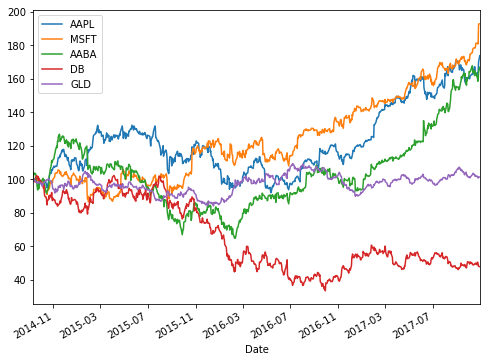

In [4]:
(fin_data/fin_data.iloc[0]*100.).plot(figsize=(8,6))

In [9]:
rets = np.log(fin_data/fin_data.shift(1)).dropna()
rets.head()

,AAPL,MSFT,AABA,DB,GLD
Date,,,,,
2014-09-12,0.002265,-0.006403,0.038512,-0.006261,-0.009166
2014-09-15,-0.000295,-0.009899,-0.007726,-0.003145,0.002194
2014-09-16,-0.007605,0.011183,0.003753,0.001145,0.001600
2014-09-17,0.007113,-0.005146,-0.002814,0.002856,-0.010915
2014-09-18,0.002065,0.003434,-0.011809,0.020328,0.002040


In [10]:
rets.mean()*252

AAPL    0.176253
MSFT    0.209463
AABA    0.163380
DB     -0.235045
GLD     0.004402
dtype: float64

In [11]:
rets.cov()*252

,AAPL,MSFT,AABA,DB,GLD
AAPL,0.052852,0.026016,0.023143,0.023665,-0.003981
MSFT,0.026016,0.051155,0.026233,0.028386,-0.004354
AABA,0.023143,0.026233,0.079362,0.029466,-0.003870
DB,0.023665,0.028386,0.029466,0.154685,-0.013379
GLD,-0.003981,-0.004354,-0.003870,-0.013379,0.020613


In [15]:
# draw random asset allocation
noa = len(symbols)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([ 0.23269388,  0.08282025,  0.08719456,  0.1776405 ,  0.41965081])

In [16]:
# expected return of portfolio
np.sum(rets.mean()*weights)*252

0.032700222876810105

In [17]:
# expected portfolio variance
np.dot(weights.T, np.dot(rets.cov() * 252,weights))

0.014994688225335551